# Import Packages

In [1]:
import sys  # Read system parameters.

import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import seaborn as sb  # Perform data visualization.
import sklearn  # Perform data mining and analysis.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

# Print summary
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]
- NumPy 1.22.3
- pandas 1.4.1
- Matplotlib 3.8.4
- scikit-learn 1.2.2



In [2]:
wheat = pd.read_csv(
    "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/wheat_seeds.csv",
    header=None,
    delimiter=",",
    names=[
        "Area",
        "Perimeter",
        "Compactness",
        "Length_of_kernel",
        "Width_of_kernel",
        "Asymmetry_coefficient",
        "Length_of_kernel_groove",
        "Class(123)",
    ],
)
df = wheat.copy()

### View sample data

In [3]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class(123)
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Explore the Dataset

#### Count total NaN or missing values for each column in a DataFrame

The next step checks for Nan and Null or missing values. This may be considered somewhat repetitive since the details are already included in the output of the .info() command. Nevertheless, there is no disadvantage in being thoroughly comprehensive.

In [4]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class(123)                 0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_kernel         210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class(123)               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Check the data types and look for any missing entries.

**Spotlights** 

- The dataset consists of 210 entries and 5 attributes.
- All attributes are float numbers, except for the target attribute, which consists of integers. This target attribute indicates the seeds species that the model is expected to predict, categorized as 1, 2, or 3.
  
The labels for each species are defined as follows:
- Kama is labeled as 1.
- Rosa is labeled as 2.
- Canadian is labeled as 3.

- There are no missing values; every entry is complete with data in all attributes.
- The attributes provide various characteristics that aid in the classification of each specimen.

In [6]:
target_classes = df["Class(123)"].value_counts()

target_classes_list = target_classes.to_list()
print("Kama (Class 1):", target_classes_list[0], "\n")
print("Rosa (Class 2):", target_classes_list[1], "\n")
print("Besni (Class 3):", target_classes_list[2], "\n")


Kama (Class 1): 70 

Rosa (Class 2): 70 

Besni (Class 3): 70 



### Rename target column 'Class' 

In [7]:
df.rename(columns={"Class(123)": "target"}, inplace=True)
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Axes: title={'center': 'Count (target)'}>

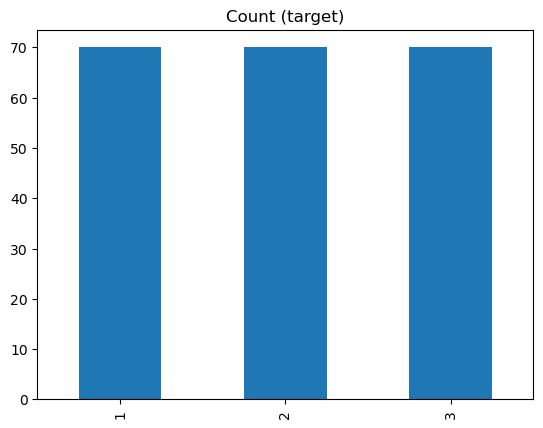

In [8]:
target_classes.plot(kind="bar", title="Count (target)", grid=False)

**Spotlights** 

The distribution of outcomes in this dataset is notably symmetrical, with both classes occurring at equal frequencies. This characteristic positions it as an excellent candidate for implementation within a Support Vector Machine (SVM) model, distinguishing it from many datasets typically found in practical applications.

## Examine Summary Statistics

In [9]:
with pd.option_context("float_format", "{:.2f}".format):
    print(df.describe())

        Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
count 210.00     210.00       210.00            210.00           210.00   
mean   14.85      14.56         0.87              5.63             3.26   
std     2.91       1.31         0.02              0.44             0.38   
min    10.59      12.41         0.81              4.90             2.63   
25%    12.27      13.45         0.86              5.26             2.94   
50%    14.36      14.32         0.87              5.52             3.24   
75%    17.30      15.71         0.89              5.98             3.56   
max    21.18      17.25         0.92              6.67             4.03   

       Asymmetry_coefficient  Length_of_kernel_groove  target  
count                 210.00                   210.00  210.00  
mean                    3.70                     5.41    2.00  
std                     1.50                     0.49    0.82  
min                     0.77                     4.52    1.00  
25% 

**Spotlights**

- The dataset is quite straightforward and generally tidy, requiring minimal feature engineering.
- There might be a handful of outliers that could affect the performance of a classification model.

### Graph Figures

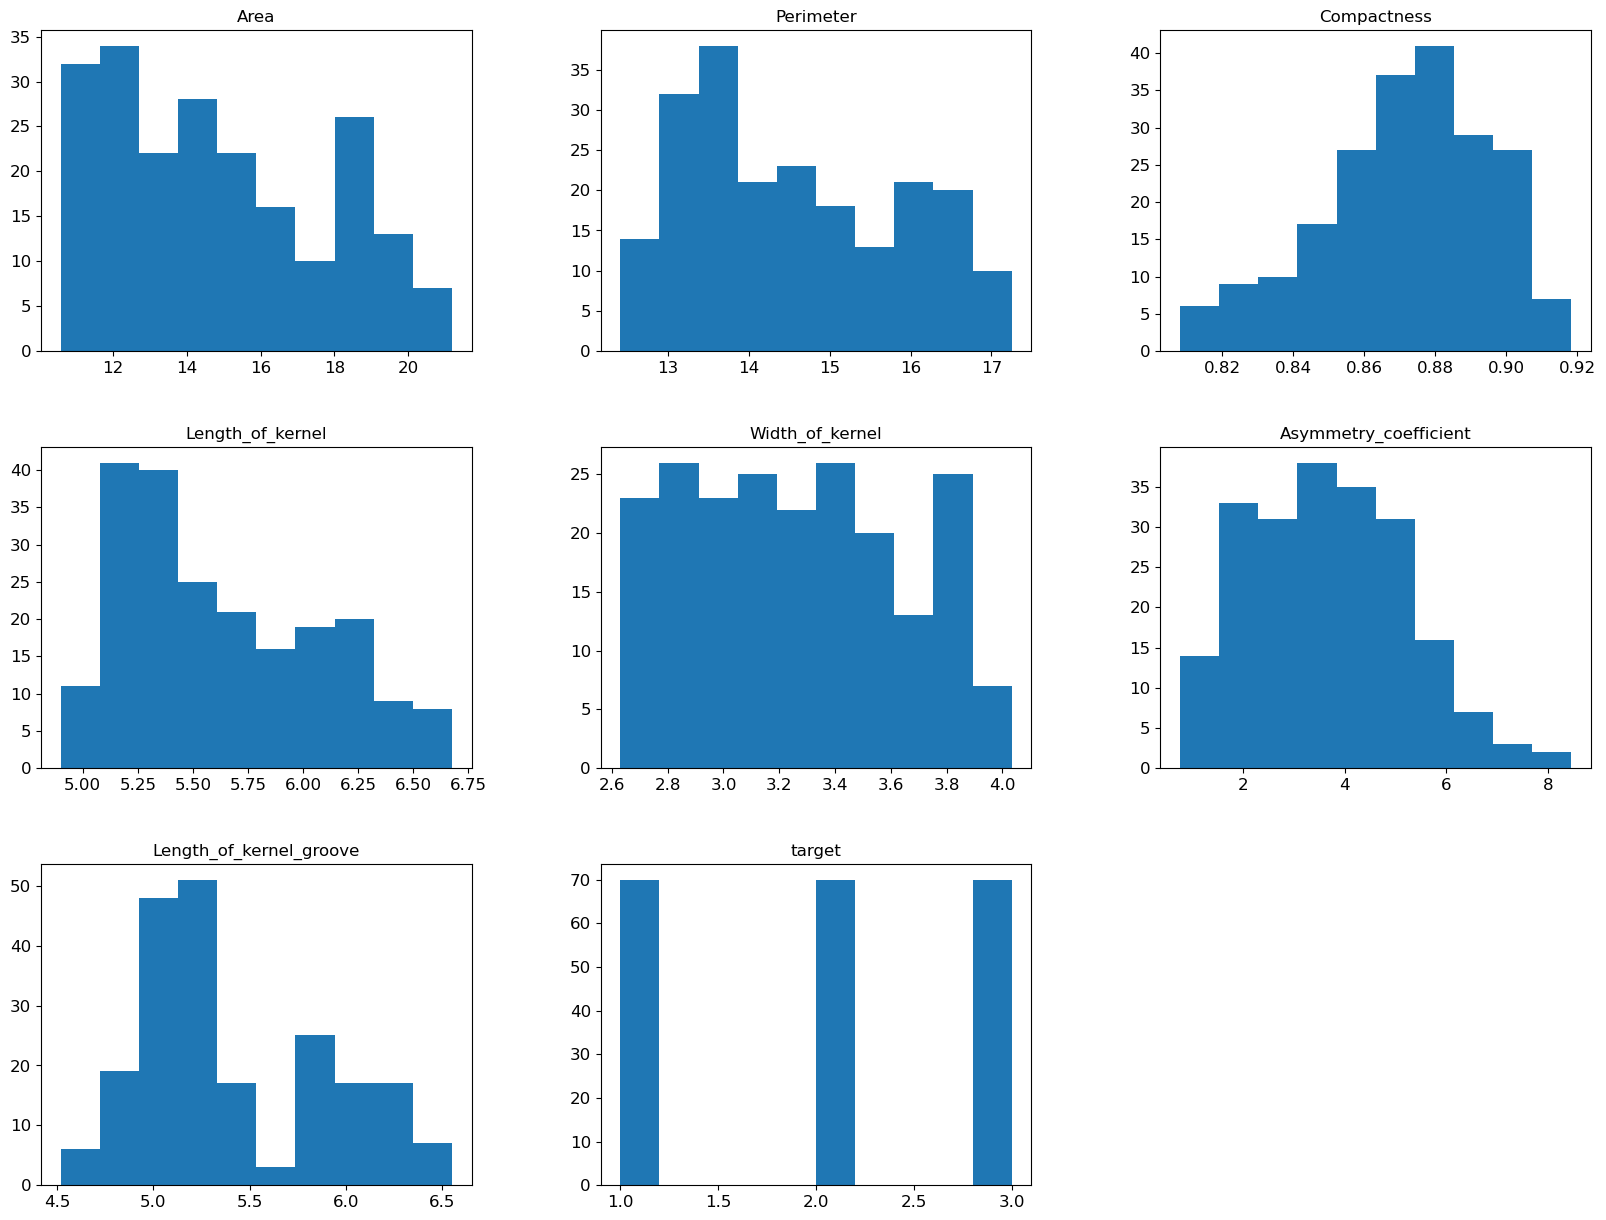

<Figure size 640x480 with 0 Axes>

In [10]:
%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

df.hist(figsize=(20, 15), grid=False)
plt.figure();

**Spotlights**

- The dataset is relatively simple and well-organized, necessitating only a limited amount of feature engineering.
- A few outliers may exist that could potentially impact the effectiveness of a classification model.
- In general, the dataset's straightforward nature facilitates ease of use, although it remains crucial to monitor outliers.
- Additionally, the distribution of class labels (target) is balanced as discussed earlier. 